In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

import ggplot
plt.style.use('fivethirtyeight')


### Loading Data & Exploratory Data Analysisb

In [210]:
df = pd.read_csv('pitches', parse_dates = ['date'])

In [211]:
print('data shape:', df.shape)
df = df[:100000]
df.head()

data shape: (718961, 125)


,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,is_final_pitch,final_balls,final_strikes,final_outs,start_tfs,start_tfs_zulu,batter_id,stand,b_height,pitcher_id,...,runner5_id,runner5_start,runner5_end,runner5_event,runner5_score,runner5_rbi,runner5_earned,runner6_id,runner6_start,runner6_end,runner6_event,runner6_score,runner6_rbi,runner6_earned,runner7_id,runner7_start,runner7_end,runner7_event,runner7_score,runner7_rbi,runner7_earned,created_at,added_at,modified_at,modified_by
0,14143226,286874,2011,2011-03-31,108,118,1,1,1,1,1,0,0,0,0,0,2,1,1,201226,2011-03-31 20:12:26,430895,L,5-8,460024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
1,14143227,286874,2011,2011-03-31,108,118,1,1,1,2,2,1,0,0,0,0,2,1,1,201226,2011-03-31 20:12:26,430895,L,5-8,460024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
2,14143228,286874,2011,2011-03-31,108,118,1,1,1,3,3,2,0,0,0,0,2,1,1,201226,2011-03-31 20:12:26,430895,L,5-8,460024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
3,14143229,286874,2011,2011-03-31,108,118,1,1,1,4,4,2,1,0,0,1,2,1,1,201226,2011-03-31 20:12:26,430895,L,5-8,460024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1
4,14143230,286874,2011,2011-03-31,108,118,1,1,2,1,5,0,0,0,1,0,2,2,1,201354,2011-03-31 20:13:54,435062,R,5-10,460024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-03 21:33:20,2016-03-03 21:33:20,2016-03-03 21:33:20,1


In [212]:
df.info(null_counts=True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 125 columns):
uid                100000 non-null int64
game_pk            100000 non-null int64
year               100000 non-null int64
date               100000 non-null datetime64[ns]
team_id_b          100000 non-null int64
team_id_p          100000 non-null int64
inning             100000 non-null int64
top                100000 non-null int64
at_bat_num         100000 non-null int64
pcount_at_bat      100000 non-null int64
pcount_pitcher     100000 non-null int64
balls              100000 non-null int64
strikes            100000 non-null int64
fouls              100000 non-null int64
outs               100000 non-null int64
is_final_pitch     100000 non-null int64
final_balls        100000 non-null int64
final_strikes      100000 non-null int64
final_outs         100000 non-null int64
start_tfs          100000 non-null int64
start_tfs_zulu     100000 non-null object
batter_id         

From looking at this data so far, we can see that there are many columns with nans. We will have to evaluate columns with too many nans for removal.

In [213]:
#lets look into the null target values, it looks like a small percentage (only around 3%), we can safely remove them
print('count', df.pitch_type.isnull().sum())
df.pitch_type.isnull().sum()/len(df.pitch_type) 

count 393


0.00393

In [214]:
df = df.drop(df[df.pitch_type.isnull()].index, axis = 0)

Let's explore the pitch type data

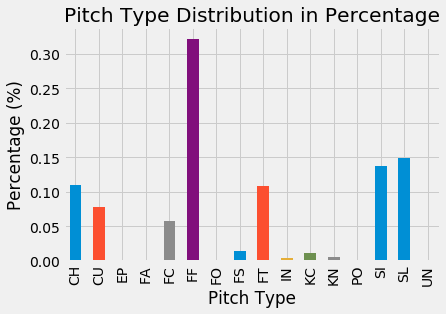

In [215]:
(df.groupby('pitch_type').count()['uid']/len(df)).plot.bar(ylim=0)
plt.ylabel('Percentage (%)')
plt.xlabel('Pitch Type')
plt.title('Pitch Type Distribution in Percentage')
plt.show()

From the pitch distribution we can see a class imbalance in the distribution. FF, presumably fastball is the most common.


### Understanding pitch types and grouping into categories of pitch types

Resources: <br>
Abbreviations: <a href = "https://books.google.com/books?id=LlJHDwAAQBAJ&pg=PA319#v=onepage&q&f=false">Analyzing Baseball Data with R, pg 319</a>

Categorizing into groups:
<a href ="https://www.fangraphs.com/library/pitch-type-abbreviations-classifications/">Fan Graphs</a> <br>

After reviewing the Fan Graphs & Wikipedia I've categorized pitches according to the info below.

'fastball': 'FF', 'FT', 'FS', 'FA'<br>
'slider': 'SL',<br>
'curveball': 'CU', 'KC'<br>
'sinker': 'SI'<br>
'cutter': 'FC'<br>
'changeup': 'CH', 'FO'<br>
'purpose-pitch': 'IN', 'PO', 'AB'<br>
'off-speed': 'KN', 'EP', 'SC'
<br>
*dropping UN as it is an unidentified pitch and a small percentage of the data set

In [216]:
#dropping UN (unidentified)
df = df.drop(df[df['pitch_type'] == 'UN'].index, axis = 0) 

In [217]:
pitch_catg = {'FF': 'fastball','SL': 'slider','CU': 'curveball','SI': 'sinker','FC': 'cutter','FT': 'fastball','KC': 'curveball','CH': 'changeup','IN': 'purpose-pitch','KN': 'off-speed','FS': 'fastball','FA': 'fastball','PO': 'purpose-pitch','EP': 'off-speed','SC': 'off-speed','AB': 'purpose-pitch','FO': 'changeup'}

In [218]:
#conversion of pitch type to new categories
def convert_pitch(row):
        return pitch_catg[row['pitch_type']]
    
df.loc[:, 'pitch_type'] = df.apply(convert_pitch, axis = 1)

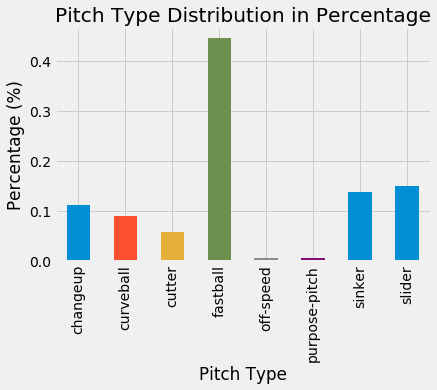

In [219]:
#plotting bar chart for new pitch types 
(df.groupby('pitch_type').count()['uid']/len(df)).plot.bar(ylim=0)
plt.ylabel('Percentage (%)')
plt.xlabel('Pitch Type')
plt.title('Pitch Type Distribution in Percentage')
plt.show()

Now we have only 8 categories of pitches that we will have to predict for. 

### More data cleaning & EDA

In [220]:
metadata = pd.read_csv('pitch_by_pitch_metadata.csv', encoding='latin-1')
print(metadata.head())

  column_name available_prior_to_pitch                   description
0         uid                      Yes                     unique id
1     game_pk                      Yes                unique game id
2        year                      Yes                          year
3        date                      Yes                          date
4   team_id_b                      Yes  team_id for the batting team


Let's work with the data that is available prior to the pitch for now.

In [221]:
not_avail = metadata[metadata.available_prior_to_pitch == 'No']
not_avail = not_avail.column_name.tolist()
not_avail.remove('pitch_type')
not_avail = df[not_avail] 
print(not_avail.shape)

(99605, 43)


In [222]:
avail_data = metadata[metadata.available_prior_to_pitch == 'Yes']
avail_data = ['pitch_type'] + avail_data.column_name.tolist()
df = df[avail_data]
print(df.shape)

(99605, 29)


In [223]:
df.head()

,pitch_type,uid,game_pk,year,date,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,start_tfs,start_tfs_zulu,batter_id,stand,b_height,pitcher_id,p_throws,away_team_runs,home_team_runs,pitch_id,on_1b,on_2b,on_3b
26,fastball,14143252,286874,2011,2011-03-31,118,108,1,0,7,1,1,0,0,0,0,202650,2011-03-31 20:26:50,449107,R,5-10,450308,R,0,0,51,NaN,NaN,NaN
27,fastball,14143253,286874,2011,2011-03-31,118,108,1,0,7,2,2,0,1,0,0,202650,2011-03-31 20:26:50,449107,R,5-10,450308,R,0,0,52,NaN,NaN,NaN
28,fastball,14143254,286874,2011,2011-03-31,118,108,1,0,7,3,3,1,1,0,0,202650,2011-03-31 20:26:50,449107,R,5-10,450308,R,0,0,53,NaN,NaN,NaN
29,fastball,14143255,286874,2011,2011-03-31,118,108,1,0,7,4,4,2,1,0,0,202650,2011-03-31 20:26:50,449107,R,5-10,450308,R,0,0,54,NaN,NaN,NaN
30,fastball,14143256,286874,2011,2011-03-31,118,108,1,0,7,5,5,2,2,1,0,202650,2011-03-31 20:26:50,449107,R,5-10,450308,R,0,0,55,NaN,NaN,NaN


In [224]:
df.drop(['uid', 'game_pk', 'year', 'start_tfs_zulu', 'start_tfs'], axis = 1, inplace = True)

In [225]:
df.corr()

,team_id_b,team_id_p,inning,top,at_bat_num,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,batter_id,pitcher_id,away_team_runs,home_team_runs,pitch_id,on_1b,on_2b,on_3b
team_id_b,1.000000,-0.040346,0.008807,0.000117,-0.004642,-0.009596,-0.003168,-0.004144,-0.008699,-0.008076,0.001884,0.018871,0.006720,-0.044996,-0.029677,-0.015229,0.015440,-0.034744,0.020379
team_id_p,-0.040346,1.000000,0.000030,-0.001935,-0.013990,-0.009953,0.007877,-0.009970,-0.002803,-0.010443,0.004068,-0.022965,-0.141865,-0.051786,-0.038838,-0.025575,-0.018474,-0.012769,-0.045839
inning,0.008807,0.000030,1.000000,0.042371,0.977740,0.000643,-0.012926,0.002115,-0.006653,0.012914,-0.000830,0.014806,0.024682,0.514918,0.502540,0.967443,0.037320,0.029175,0.055180
top,0.000117,-0.001935,0.042371,1.000000,-0.050688,-0.003414,-0.002897,-0.004555,0.001554,-0.002836,-0.008051,0.009783,0.002465,-0.040495,-0.010716,-0.049324,0.037815,0.020879,0.001384
at_bat_num,-0.004642,-0.013990,0.977740,-0.050688,1.000000,0.001259,-0.032785,0.003324,-0.006919,0.012609,0.049597,0.012980,0.023401,0.602349,0.583383,0.995344,0.025786,0.023485,0.053903
pcount_at_bat,-0.009596,-0.009953,0.000643,-0.003414,0.001259,1.000000,0.033234,0.813905,0.790892,0.660790,0.011079,0.009448,0.003503,-0.001016,-0.001257,0.011865,0.004117,0.007779,0.008744
pcount_pitcher,-0.003168,0.007877,-0.012926,-0.002897,-0.032785,0.033234,1.000000,0.029404,0.024445,0.034960,0.089516,-0.005517,-0.028650,-0.086064,-0.062362,-0.054867,-0.023765,-0.028537,-0.050729
balls,-0.004144,-0.009970,0.002115,-0.004555,0.003324,0.813905,0.029404,1.000000,0.374349,0.302646,0.019494,0.006980,0.002116,-0.001320,-0.001210,0.012195,-0.007172,0.002440,0.002201
strikes,-0.008699,-0.002803,-0.006653,0.001554,-0.006919,0.790892,0.024445,0.374349,1.000000,0.592057,-0.000474,0.009383,0.002527,-0.003207,-0.000802,0.001329,0.005017,0.003593,0.007547
fouls,-0.008076,-0.010443,0.012914,-0.002836,0.012609,0.660790,0.034960,0.302646,0.592057,1.000000,-0.002122,-0.003844,0.003852,0.006067,0.001515,0.019123,0.013421,0.021812,0.029842


High correlation (0.975586) between 'inning' & 'at_bat_num' which means likelihood of multicollinearity. After testing it's impact we can safely drop 'at_bat_num'

Converting height from ft-in to inches.

In [226]:
#function to convert height to integer type in inches
def height_in_inches(row):
            return(int(row['b_height'][0]) * 12 + abs(int(row['b_height'][-2:])))

#applying height conversion    
df.loc[:, 'b_height_in'] = df.apply(height_in_inches, axis = 1)

# dropping old b_height column
df = df.drop('b_height', axis=1) #replaced with b_height_in

# on_1b, on_2b, on_3b have null values, it makes sense to replace the nans with zeros as it means no one is on base
for col in ['on_1b', 'on_2b', 'on_3b']:
    df[col] = df[col].fillna(0)

In [227]:
#lets look at the unique values per column, the year column stands out with 1 value
df.nunique()

pitch_type           8
date                27
team_id_b           30
team_id_p           30
inning              14
top                  2
at_bat_num         122
pcount_at_bat       14
pcount_pitcher     130
balls                4
strikes              3
fouls               10
outs                 3
batter_id          542
stand                2
pitcher_id         424
p_throws             2
away_team_runs      17
home_team_runs      15
pitch_id          1017
on_1b              485
on_2b              456
on_3b              412
b_height_in         16
dtype: int64

In [228]:
df.rename(index=str, columns={"pitch_type": "target"}, inplace = True)

In [229]:
df.dtypes.value_counts()

int64             17
float64            3
object             3
datetime64[ns]     1
dtype: int64

In [230]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

target      8
stand       2
p_throws    2
dtype: int64

In [231]:
#label encoding object types with only 2 unique values (stand & p_throws)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['stand'] = le.fit_transform(df['stand'])
df['p_throws'] = le.fit_transform(df['p_throws'])

#check to make sure it converted correctly with right hand as the most common
print(df.p_throws.value_counts())
df.stand.value_counts() 

1    72641
0    26964
Name: p_throws, dtype: int64


1    56338
0    43267
Name: stand, dtype: int64

In [232]:
pitches = df['target'].unique().tolist()

### First Model Building

For the first model we can use the features that are available prior to the pitch.

In [233]:
#first model
features = ['team_id_b', 'team_id_p', 'inning', 'top', 'pcount_at_bat', 'pcount_pitcher', 'balls', 'strikes',
       'fouls', 'outs', 'batter_id', 'stand', 'at_bat_num',
       'b_height_in', 'pitcher_id', 'p_throws', 'away_team_runs',
       'home_team_runs', 'on_1b', 'on_2b', 'on_3b', 'target']

In [234]:
df1 = df[features]

converting categorical predictors to dummy variables

In [235]:
dummy_cols = ['batter_id', 'pitcher_id']
df1 = pd.get_dummies(df1, columns=dummy_cols)

label encoding the target labels for the model

In [236]:
le = preprocessing.LabelEncoder()
le.fit(pitches)
print(list(le.classes_))
df1['target'] = le.transform(df1['target'])

['changeup', 'curveball', 'cutter', 'fastball', 'off-speed', 'purpose-pitch', 'sinker', 'slider']


As this is a time series data. We will have to do a train/test split in a way to avoid using future data in our training model. We can do that by maintaining a random_state of 0 and splitting the latter 1/3 of our data. 

In [237]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, random_state=0, test_size=0.30, shuffle=False)

y_train = train.pop('target')
X_train = train

y_test = test.pop('target')
X_test = test

# getting geatures label for later
features_labels = X_train.columns

### Modeling

Baseline model: Predicting the most common (Fastball)

In [238]:
# create a copy of y_test array with value filled in as 3 (fastball)
y_pred = y_test.copy()
y_pred.loc[:,]  = 3

#print results for baseline prediction
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))


Accuracy =  0.451442339870156


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3159
          1       0.00      0.00      0.00      2725
          2       0.00      0.00      0.00      1753
          3       0.45      1.00      0.62     13490
          4       0.00      0.00      0.00        75
          5       0.00      0.00      0.00       142
          6       0.00      0.00      0.00      4097
          7       0.00      0.00      0.00      4441

avg / total       0.20      0.45      0.28     29882



We can run a  Random Forest model to see if there is any predictive power in our current features

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Standarize features
scaler = StandardScaler()
scaler.fit(X_train)
X_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#Running RandomForest Classifier
classifier = RandomForestClassifier(n_estimators = 100,  random_state = 0, n_jobs= -1)
model = classifier.fit(X_std, y_train)

# Predict class
y_pred = model.predict(X_test_std)

print("-" * 10, 'Random Forest' )
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))

---------- Random Forest
Accuracy =  0.5310889498694866


             precision    recall  f1-score   support

          0       0.36      0.05      0.09      3159
          1       0.39      0.05      0.09      2725
          2       0.47      0.11      0.18      1753
          3       0.53      0.96      0.68     13490
          4       0.74      0.92      0.82        75
          5       0.00      0.00      0.00       142
          6       0.60      0.49      0.54      4097
          7       0.46      0.08      0.14      4441

avg / total       0.49      0.53      0.43     29882



The basic model without feature engineering shows an improvement over the baseline model in f1-score and accuracy. We are mostly interested in looking at the average f1-score as it will take into consideration the precision and accuracy of the model for all of the different classes. 

### More Exploratory Data Analysis

Adding the post pitch data to the pre-pitch data


In [183]:
df_full = df

In [244]:
not_avail = not_avail[not_avail.index.isin(df.index)]

df_full.reset_index(inplace= True, drop = True)
not_avail.reset_index(inplace= True, drop = True)

df = pd.concat([df_full, not_avail], axis=1)

Let's see if we can get a visual of how each pitch charts on the X and Y columns.

In [245]:
pitches = df['target'].unique().tolist()

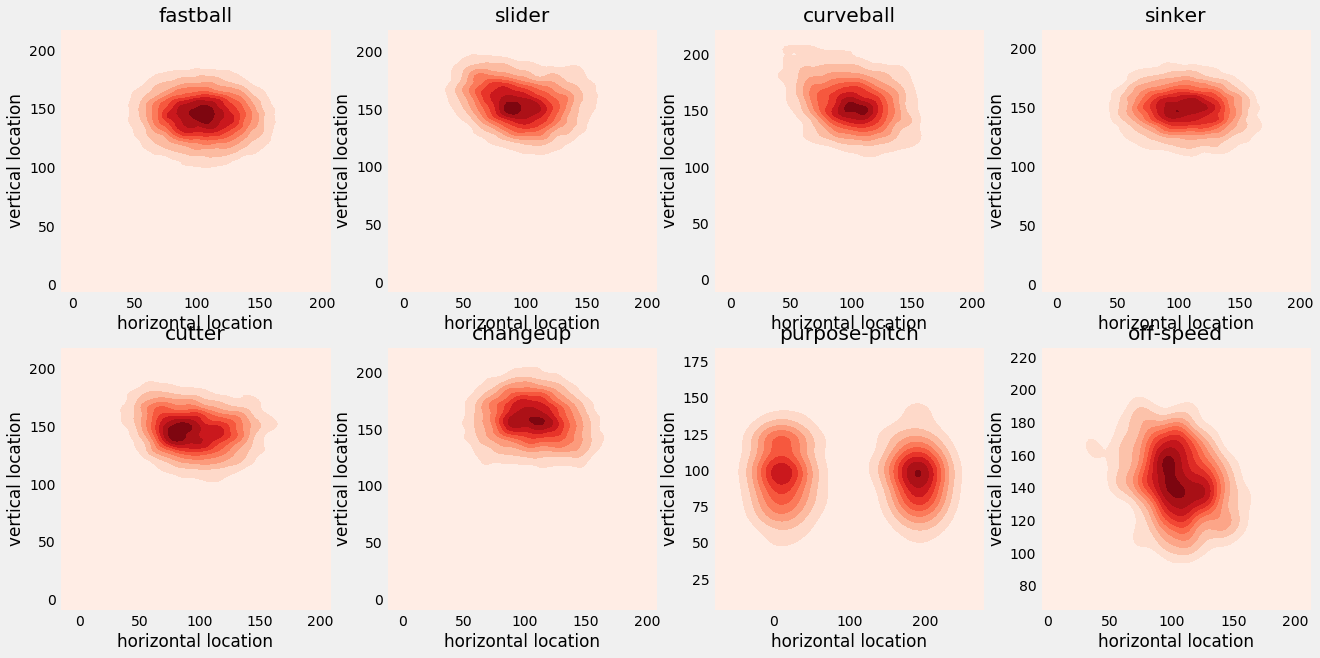

In [246]:
#Contour Plot for each pitch type. shows the location of each type on the horizontal/Vertical plot above the plate.
cnt = 0
fig = plt.figure(figsize=(20,10))
for pitch in pitches:
    cnt += 1
    mask =  df[df['target'] == pitch]
    plt.subplot(2, 4, cnt)
    sns.kdeplot(mask['x'],mask['y'], cmap="Reds", shade=True)
    plt.title(str(pitch))
    plt.xlabel('horizontal location')
    plt.ylabel('vertical location')
plt.show()

Let's compare right/left handed pitchers against batter stands. 

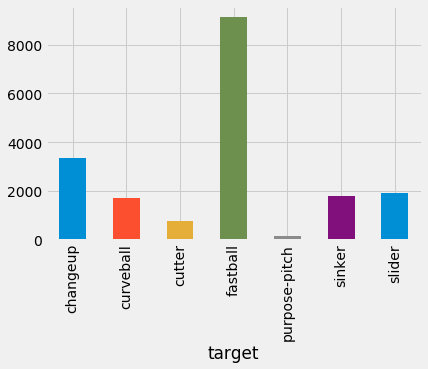

In [247]:
#only printing two graphs, but there is a clear difference in pitches between the different pitchers and batters
'''
mask =  df[df['p_throws'] == 1]
mask = mask[mask['stand'] == 1]
(mask.groupby('target')['uid'].count()).plot.bar(ylim=0)

mask =  df[df['p_throws'] == 1]
mask = mask[mask['stand'] == 0]
(mask.groupby('target')['uid'].count()).plot.bar(ylim=0)
'''
mask =  df[df['p_throws'] == 0]
mask = mask[mask['stand'] == 1]
(mask.groupby('target')['team_id_p'].count()).plot.bar(ylim=0)

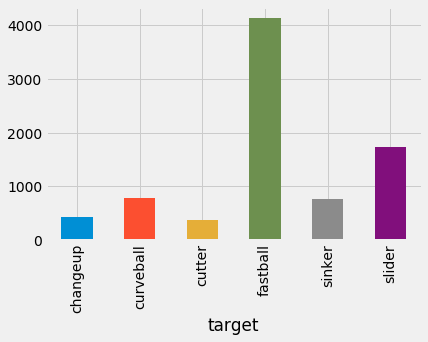

In [248]:
mask =  df[df['p_throws'] == 0]
mask = mask[mask['stand'] == 0]
(mask.groupby('target')['team_id_p'].count()).plot.bar(ylim=0)

### Feature engineering

We can create a past count of pitch types per pitcher, which we can use to get a percentage per pitch per pitcher

In [249]:
#one hot encoding to create dummy variables
dum =  pd.get_dummies(df['target'])
df = pd.concat([df, dum], axis=1) 
ohe_cols = dum.columns

In [250]:
cuml_cols = []
pct_cols = []
for col in ohe_cols:
    cuml_col = col + 'cuml'
    cuml_cols.append(cuml_col)
    df[cuml_col] = df.groupby(['pitcher_id'])[col].cumsum()

df['total_pitches'] = df[cuml_cols].sum(axis=1)

#create percentage columns
for col in  cuml_cols:
    pct_col = col[:-4] + '_pct'
    pct_cols.append(pct_col)
    df[pct_col] = df[col]/df['total_pitches']

    
#shift to move data back one pitch to avoid leakage from current pitch
for col in pct_cols:
    df[col] = df.groupby(['pitcher_id'])[col].apply(lambda x:  x.shift(1))
    
#dropping all the columns that we don't need anymore
df.drop(columns= cuml_cols, inplace = True)
df.drop(columns= ohe_cols, inplace = True)

#fill in nans
df[pct_cols] = df[pct_cols].fillna(0)

In [251]:
#df.event.value_counts()

In [252]:
#hashmap for converting at bat event outcome. 
event_catg = {'Strikeout':'out',
             'Pop Out':'out',
             'Groundout':'out',
             'Lineout':'out',
             'Flyout':'out',
             'Walk':'walk',
             'Runner Out':'out',
             'Home Run':'home_run',
             'Double':'double',
             'Single':'single',
             'Sac Bunt':'neutral',
             'Forceout':'out',
             'Grounded Into DP':'out',
             'Sac Fly':'neutral',
             'Field Error':'neutral',
             'Intent Walk':'walk',
             'Fielders Choice':'out',
             'Triple':'triple',
             'Hit By Pitch':'walk',
             'Bunt Groundout':'out',
             'Fan interference':'neutral',
             'Fielders Choice Out':'out',
             'Batter Interference':'neutral',
             'Double Play':'double',
             'Triple Play':'triple',
             'Bunt Pop Out':'out',
             'Strikeout - DP': 'out',
             'Sac Fly DP':'out'}

In [253]:
#conversion of at bat result from 28 categories to 7
def convert_at_bat_result(row):
        return event_catg.get(row['event'],'neutral')
    
df.loc[:, 'bat_result'] = df.apply(convert_at_bat_result, axis = 1)

In [254]:
#one hot encoding to create dummy variables for at bat result
#df.bat_result

dum =  pd.get_dummies(df['bat_result'])
dum[df['pcount_at_bat'] > 1] = 0

df = pd.concat([df, dum], axis=1) 

In [255]:
'''
Adding cumlative sum to players at bat result data.
'''
ohe_cols = dum.columns
cuml_cols = []
pct_bat_cols = []
for col in ohe_cols:
    cuml_col = col + 'cuml'
    cuml_cols.append(cuml_col)
    df[cuml_col] = df.groupby(['batter_id'])[col].cumsum() - 1
    df[cuml_col].replace(-1, 0, inplace=True)

df[cuml_cols].replace(-1, 0, inplace=True) 
df['total_at_bat'] = df[cuml_cols].sum(axis=1)
#editing for removal of one pitch so we are only consider total previous pitches
df['total_at_bat'] = df['total_at_bat'] - 1
df['total_at_bat'].replace(-1, 0, inplace=True)


def safe_div(row):
    if row['total_at_bat'] == 0:
        return -1
    return row[col] / row['total_at_bat']

#create percentage columns
for col in  cuml_cols:
    pct_col = col[:-4] + '_pct'
    pct_bat_cols.append(pct_col)
    df[pct_col] = df.apply(safe_div, axis=1)
       
#dropping all the columns that we don't need anymore
df.drop(columns= cuml_cols, inplace = True)
df.drop(columns= ohe_cols, inplace = True)

### Rerun model with new features

In [256]:
new_features = pct_cols + pct_bat_cols

In [257]:
df = pd.concat([df[features],df[new_features]], axis = 1)

In [258]:
df.head()

,team_id_b,team_id_p,inning,top,pcount_at_bat,pcount_pitcher,balls,strikes,fouls,outs,batter_id,stand,at_bat_num,b_height_in,pitcher_id,p_throws,away_team_runs,home_team_runs,on_1b,on_2b,on_3b,target,changeup_pct,curveball_pct,cutter_pct,fastball_pct,off-speed_pct,purpose-pitch_pct,sinker_pct,slider_pct,double_pct,home_run_pct,neutral_pct,out_pct,single_pct,triple_pct,walk_pct
0,118,108,1,0,1,1,0,0,0,0,449107,1,7,70,450308,1,0,0,0.0,0.0,0.0,fastball,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,118,108,1,0,2,2,0,1,0,0,449107,1,7,70,450308,1,0,0,0.0,0.0,0.0,fastball,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,118,108,1,0,3,3,1,1,0,0,449107,1,7,70,450308,1,0,0,0.0,0.0,0.0,fastball,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,118,108,1,0,4,4,2,1,0,0,449107,1,7,70,450308,1,0,0,0.0,0.0,0.0,fastball,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,118,108,1,0,5,5,2,2,1,0,449107,1,7,70,450308,1,0,0,0.0,0.0,0.0,fastball,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [259]:
#converting balls and strikes into a categorical category to see impact of an actual baseball scenerio such as 2 strikes 3 balls.
df['balls_strikes'] = df.strikes.astype(str) + '-' + df.balls.astype(str)  

In [260]:
df.drop(['strikes', 'balls'], axis = 1, inplace=True)

In [261]:
#converting categorical predictors to dummy variables
dummy_cols = ['team_id_b', 'team_id_p', 'batter_id', 'pitcher_id', 'balls_strikes']
df = pd.get_dummies(df, columns=dummy_cols)

In [262]:
#label encoding the target labels for the model
le = preprocessing.LabelEncoder()
le.fit(pitches)
print(list(le.classes_))
df['target'] = le.transform(df['target'])

['changeup', 'curveball', 'cutter', 'fastball', 'off-speed', 'purpose-pitch', 'sinker', 'slider']


In [263]:
#dropping 'at_bat_num' as a result of multicolinearity
df.drop('at_bat_num', axis =1, inplace= True) 

In [264]:
# Train and Test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=0, test_size=0.30, shuffle=False)

y_train = train.pop('target')
X_train = train

y_test = test.pop('target')
X_test = test

# getting geatures label for later
features_labels = X_train.columns

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Standarize features
scaler = StandardScaler()
scaler.fit(X_train)
X_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#Running RandomForest Classifier
classifier = RandomForestClassifier(n_estimators = 100,  random_state = 0, n_jobs= -1)
model = classifier.fit(X_std, y_train)

# Predict class
y_pred = model.predict(X_test_std)

print("-" * 10, 'Random Forest' )
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))


importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            features_labels[indices[f]], 
                            importances[indices[f]]))

---------- Random Forest
Accuracy =  0.5545478883608862


             precision    recall  f1-score   support

          0       0.38      0.03      0.05      3159
          1       0.38      0.04      0.07      2725
          2       0.46      0.23      0.30      1753
          3       0.57      0.92      0.71     13490
          4       0.72      1.00      0.84        75
          5       0.00      0.00      0.00       142
          6       0.53      0.77      0.63      4097
          7       0.47      0.08      0.13      4441

avg / total       0.50      0.55      0.46     29882

Feature ranking:
 1) fastball_pct                   0.093512
 2) sinker_pct                     0.062430
 3) pcount_pitcher                 0.048869
 4) slider_pct                     0.048223
 5) changeup_pct                   0.047620
 6) curveball_pct                  0.042810
 7) pcount_at_bat                  0.031935
 8) cutter_pct                     0.031701
 9) out_pct                        0.025

283) batter_id_518792               0.000293
284) batter_id_447816               0.000293
285) batter_id_407885               0.000292
286) batter_id_117601               0.000292
287) batter_id_458015               0.000292
288) batter_id_425766               0.000291
289) pitcher_id_425647              0.000290
290) batter_id_430681               0.000289
291) pitcher_id_493133              0.000289
292) batter_id_425547               0.000287
293) batter_id_408236               0.000287
294) batter_id_429664               0.000285
295) pitcher_id_429781              0.000285
296) batter_id_276346               0.000284
297) pitcher_id_150407              0.000283
298) pitcher_id_453273              0.000283
299) batter_id_150324               0.000283
300) pitcher_id_450308              0.000282
301) pitcher_id_430589              0.000282
302) batter_id_425834               0.000280
303) batter_id_435401               0.000280
304) batter_id_431145               0.000280
305) batte

From these results we can see that the new features have had a improved the model in both accuracy and f1-score. Which makes intuitive sense as each pitcher is likely to prefer/use a certain type of pitch as opposed to other pitchers. As well as different pitches are used for each batter based on the quality of at bat. 

### Future Work

- To futher improve upon the model of predicting the next pitch we can also perform gridsearch using ROC-score as the metric to find optimal parameters for our model. 
- We can compare results with other classification models. 
- I wanted to do the data wrangling for this project, but it is also possible to add last years data for each player
- Feature selection can be done to reduce the number of features that are used in the model to improve performance. 
- Time series cross validation can also be used to help in improving the training of the model